In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv
import random

In [2]:
def generate_points(w0,w1,num):
    x_=np.linspace(start=-1,stop=1,num=num)
    y_=[]
    for x in x_:
        y=w0+w1*x
        y_.append(y)
    return x_,y_
def generate_points_with_gaussian_noise(w0,w1,num):
    x_=np.linspace(start=-1,stop=1,num=num)
    y_=[]
    for x in x_:
        gaussian_error=np.random.normal(0,0.04)
        y=w0+w1*x+gaussian_error
        y_.append(y)
    return x_,y_
def gaussian_function(x,mean,variance):
  mu=mean
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
  return y

In [3]:
def prior_grid_calc(w0_values,w1_values,mean,variance):
    prior_grid=np.zeros((len(w0_values),len(w0_values)))
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):    
            prior_grid[i][j]= multivariate_normal.pdf([w0_values[i],w1_values[j]],[mean,mean], [[variance,0],[0,variance]])
    return prior_grid
def posterior_grid_calc(prior_grid,likelihood_grid):
    posterior_grid=likelihood_grid * prior_grid 
    return posterior_grid
def likelihood_grid_calc(w0_values,w1_values,x,y):
    likelihood_grid=np.zeros((len(w0_values),len(w0_values)))
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):    
              for k in range(len(x)):   
                probablity_for_single_point=gaussian_function(y[k],w0_values[i]+w1_values[j]*x[k],0.04)
                if(k==0):
                  likelihood_grid[i][j]=probablity_for_single_point
                else:
                  likelihood_grid[i][j]=likelihood_grid[i][j]*probablity_for_single_point
    return likelihood_grid

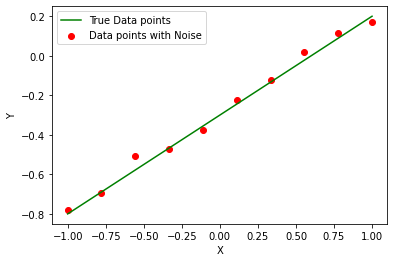

In [4]:
def pick_lines(m0,s0,beta,phi,t,num):
    phi = np.array(phi).reshape(1, 2)
    sn = inv(inv(s0) + beta*(np.transpose(phi)@phi))
    m0 = np.array(m0).reshape(2, 1)
    t = [t]
    mn = sn@(inv(s0)@m0 + beta*(np.transpose(phi).reshape(2, 1)@t))
    mn = list(mn.reshape(1, 2)[0])
    w0,w1=np.random.multivariate_normal(mn, sn, num).T
    return w0,w1,mn,sn
x_real,y_real=generate_points(-0.3,0.5,10)
x,y=generate_points_with_gaussian_noise(-0.3,0.5,10)
plt.scatter(x,y,color='red',label='Data points with Noise')
plt.plot(x_real,y_real,color='green',label='True Data points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

<Figure size 432x288 with 0 Axes>

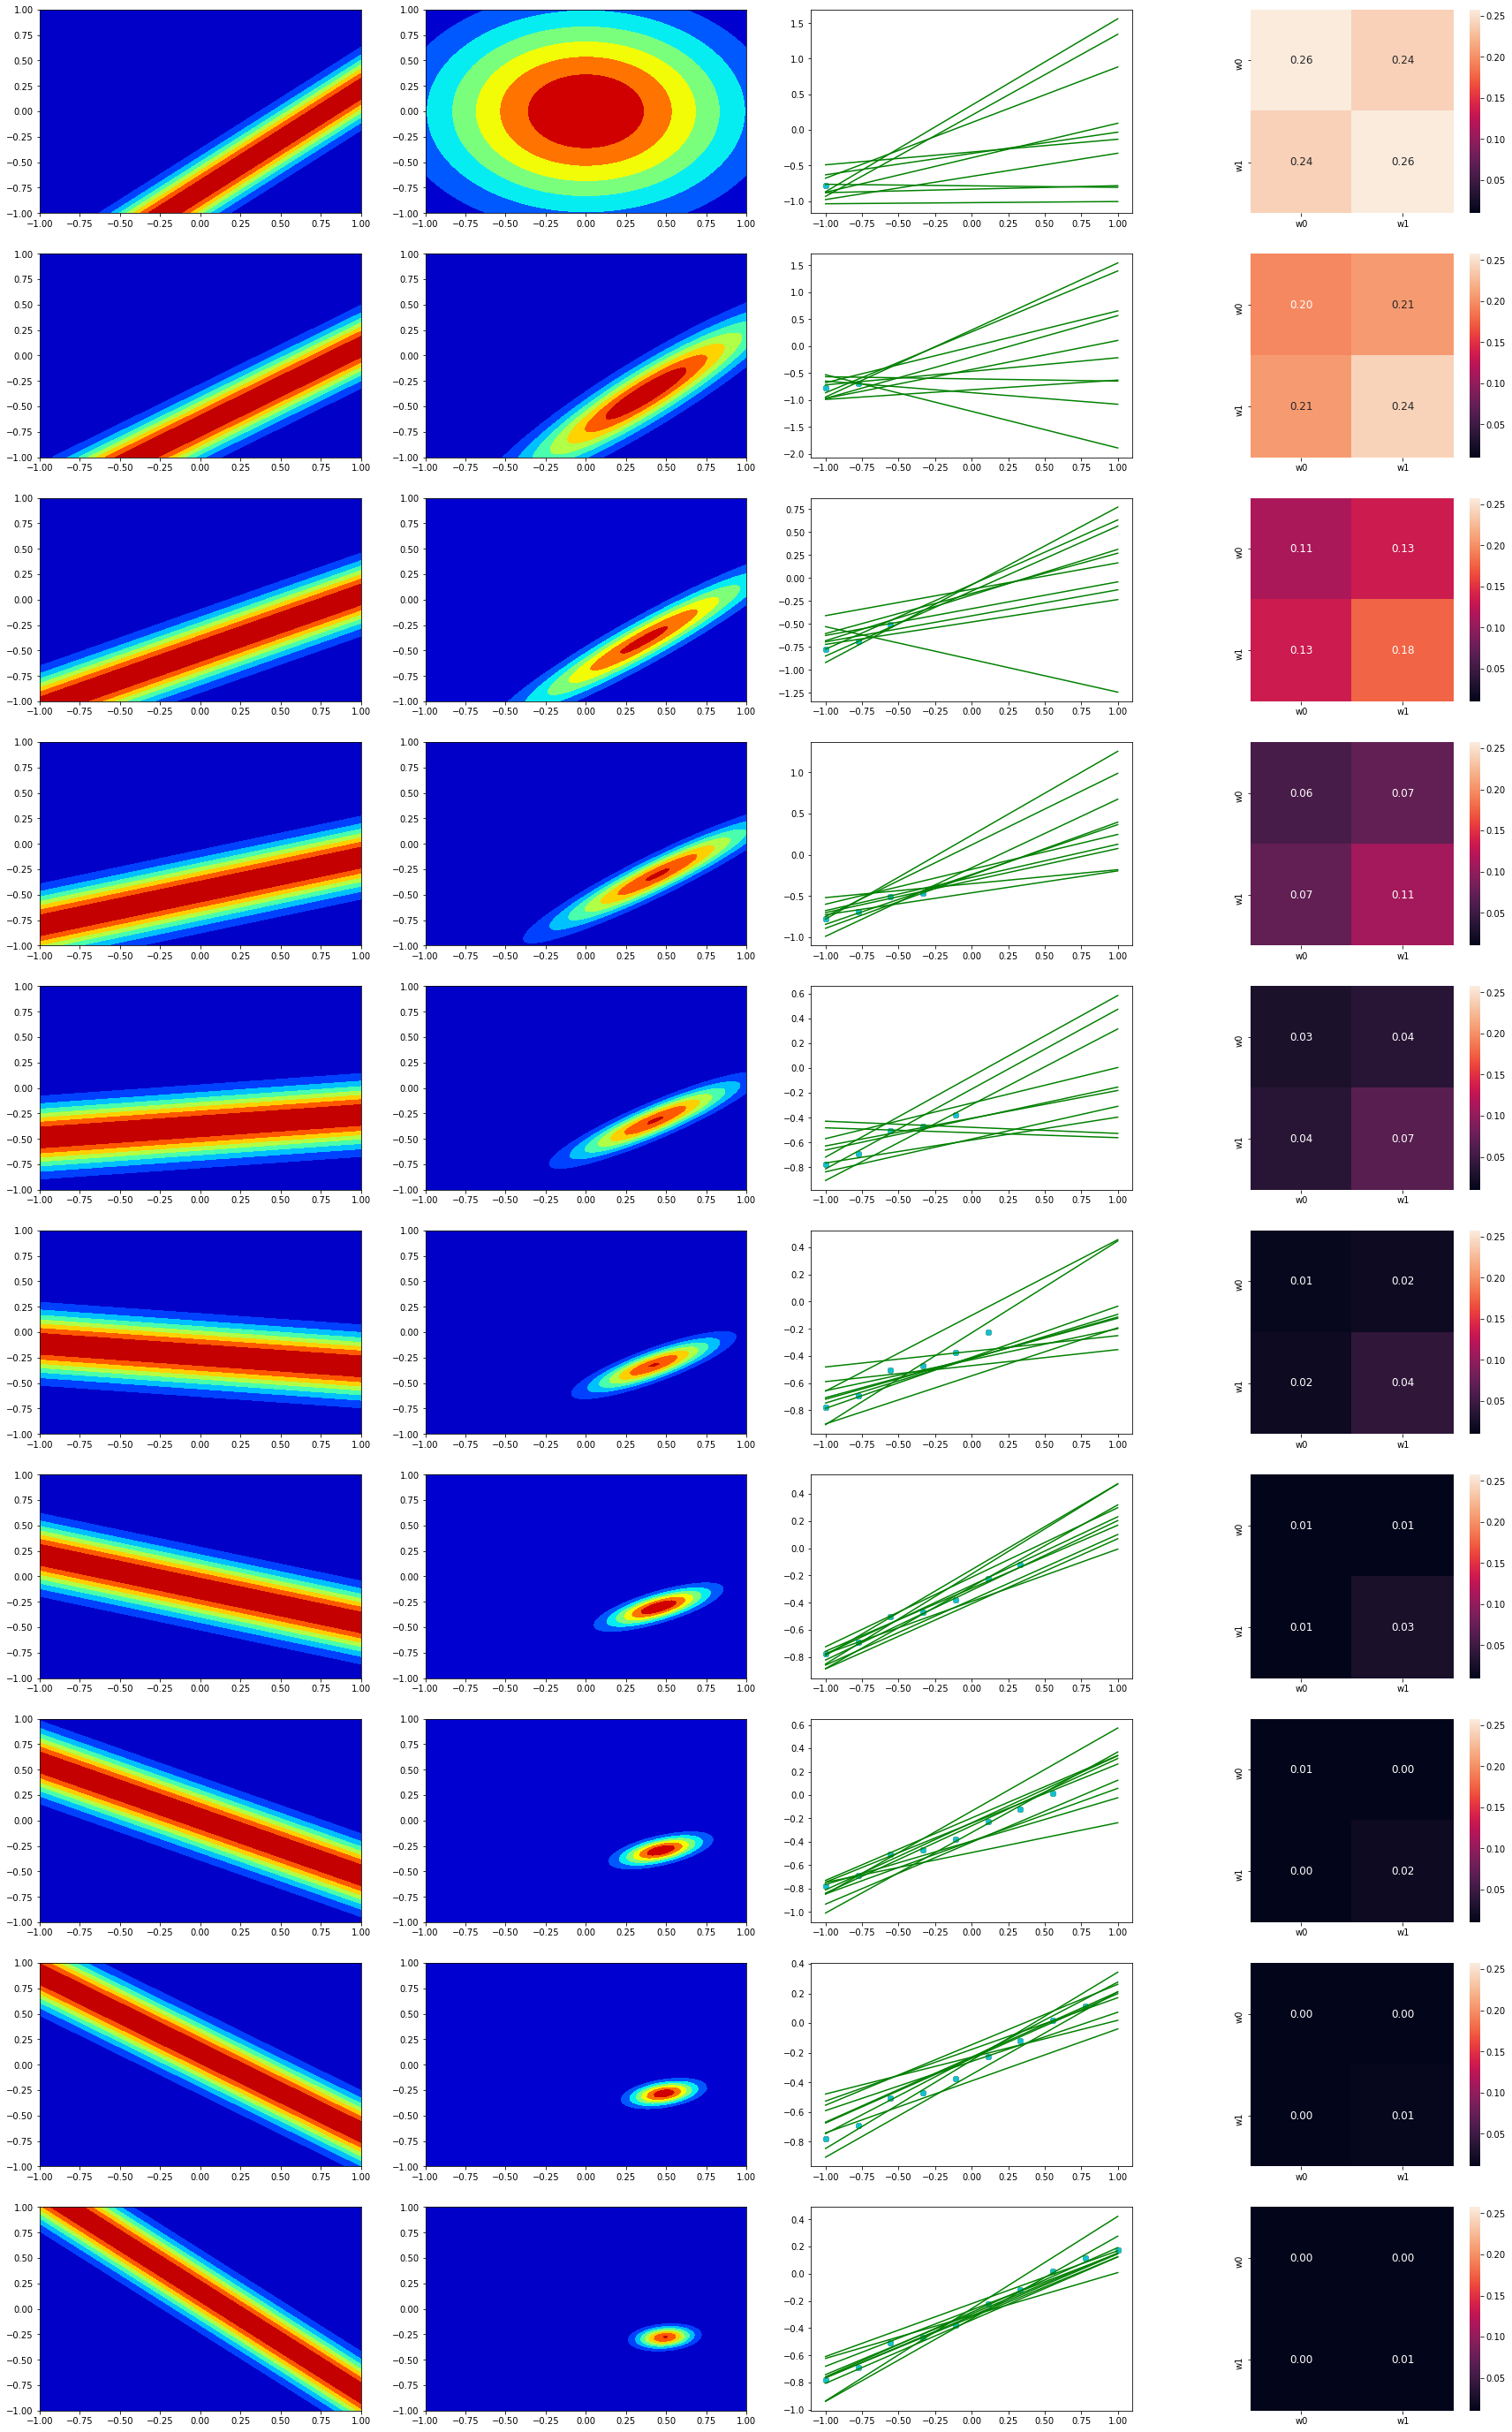

In [5]:
m0=np.array([0,0])
s0=[[0.5,0],[0,0.5]]
w0_ = np.array(np.linspace(-1,1,100));
w1_ = np.array(np.linspace(-1,1,100));
prior_grid=prior_grid_calc(w0_,w1_,0,0.5)
fig=plt.figure()
fig,ax=plt.subplots(10,4,figsize=(30,50))
c=0
x_points=np.linspace(-1,1,10)
for i in range(len(x)):
    x1=[x[i]]
    x2=x[:i+1]
    y1=[y[i]]
    y2=y[:i+1]
    phi=[1,x[i]]
    like_grid=likelihood_grid_calc(w0_,w1_,x1,y1)
    post_grid=posterior_grid_calc(prior_grid,like_grid)
    w0,w1,mn,sn=pick_lines(m0,s0,25,phi,y1,10)
    ax[c,0].contourf(w0_,w1_,like_grid,cmap="jet")
    ax[c,1].contourf(w0_,w1_,prior_grid,cmap="jet")
    for i in range(len(w0)):
        ax[c,2].plot(x_points,w0[i]+w1[i]*x_points,color="green")
        ax[c,2].scatter(x2,y2)
    sns.heatmap(sn,cbar=True,annot=True,square=True,robust=True,vmin = 0.010,vmax = 0.2575,fmt='.2f',annot_kws={'size': 12},yticklabels=['w0','w1'],xticklabels=['w0','w1'],ax=ax[c,3],)
    m0=mn
    s0=sn
    prior_grid=post_grid
    c+=1
plt.savefig("task4.png")